In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/diamonds.csv")

df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [33]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,3
color,1
clarity,0
depth,1
table,0
price,0
x,0
y,0


In [34]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [46]:
categorical_cols = ['cut', 'color']
numerical_cols = ['depth']

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)



/tmp/ipython-input-2202488525.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-2202488525.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [36]:
df.drop_duplicates(inplace=True)


In [47]:
dim_cols = ['x', 'y', 'z']


In [48]:
df[dim_cols].describe()


,x,y
count,53794.000000,53794.000000
mean,5.731214,5.734653
std,1.120695,1.141209
min,0.000000,0.000000
25%,4.710000,4.720000
50%,5.700000,5.710000
75%,6.540000,6.540000
max,10.740000,58.900000


In [37]:
categorical_cols = ["cut", "color", "clarity"]

for col in categorical_cols:
    df[col] = df[col].astype("category")


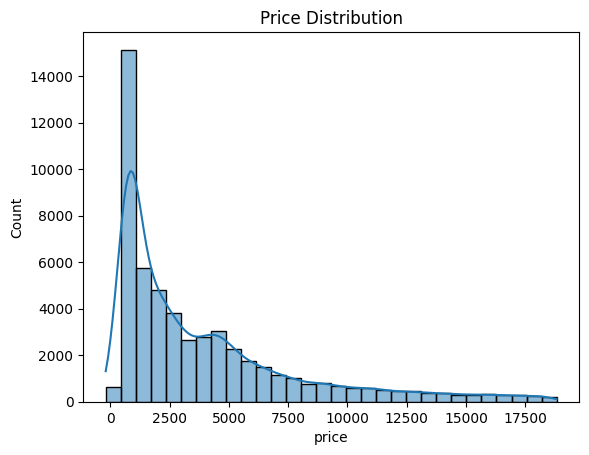

In [38]:
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()


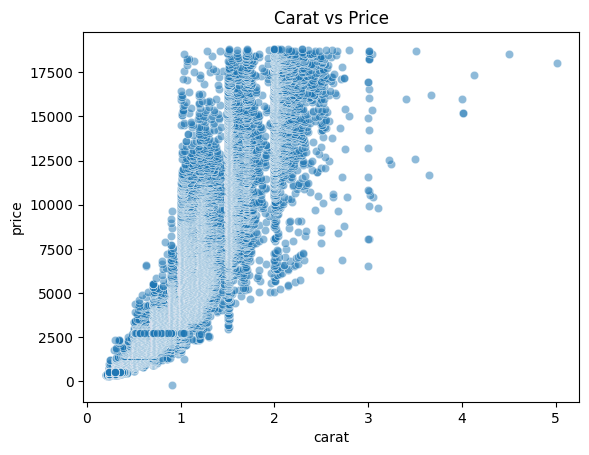

In [39]:
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Carat vs Price")
plt.show()


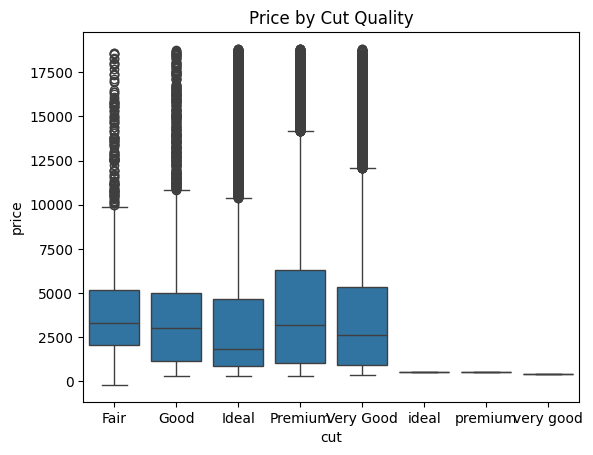

In [40]:
sns.boxplot(data=df, x="cut", y="price")
plt.title("Price by Cut Quality")
plt.show()


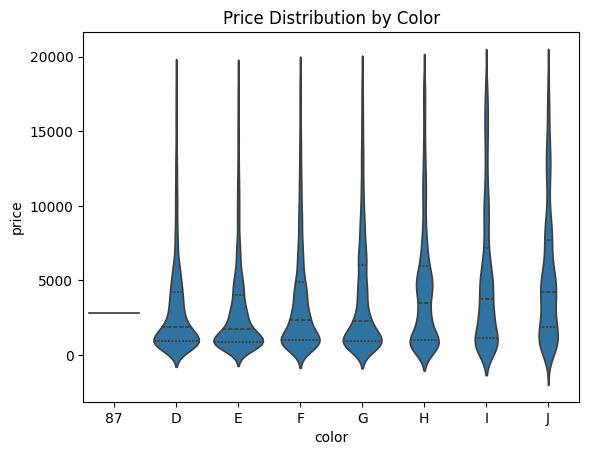

In [41]:
sns.violinplot(data=df, x="color", y="price", inner="quartile")
plt.title("Price Distribution by Color")
plt.show()


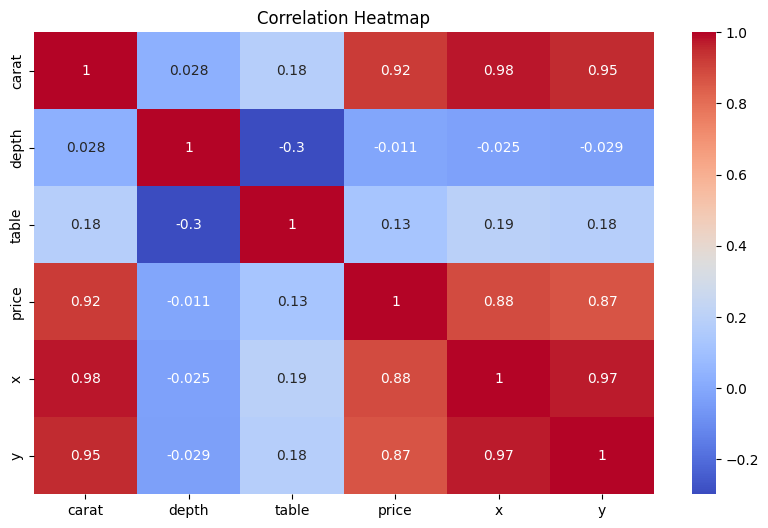

In [42]:
import numpy as np

corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


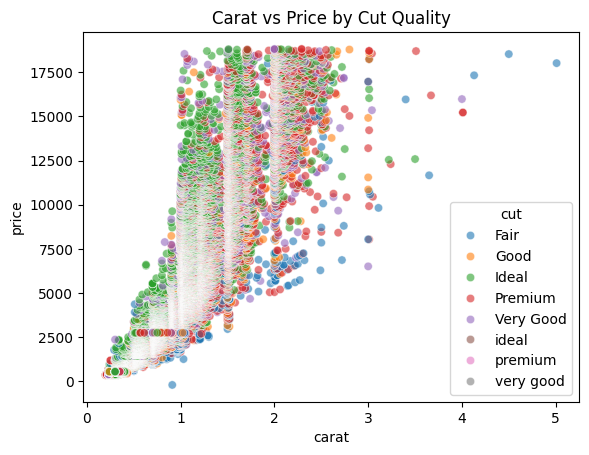

In [43]:
sns.scatterplot(data=df, x="carat", y="price", hue="cut", alpha=0.6)
plt.title("Carat vs Price by Cut Quality")
plt.show()


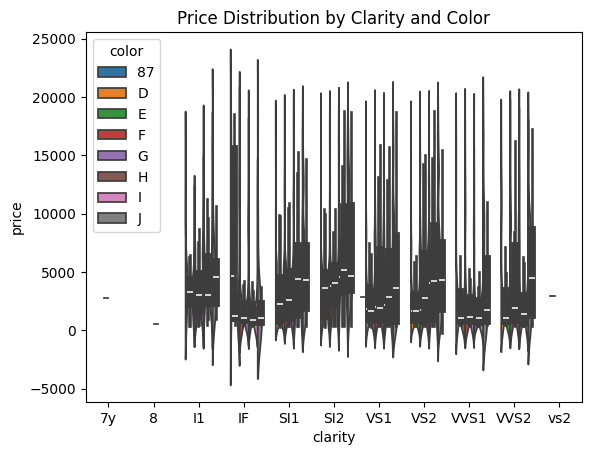

In [44]:
sns.violinplot(data=df, x="clarity", y="price", hue="color", split=True)
plt.title("Price Distribution by Clarity and Color")
plt.show()


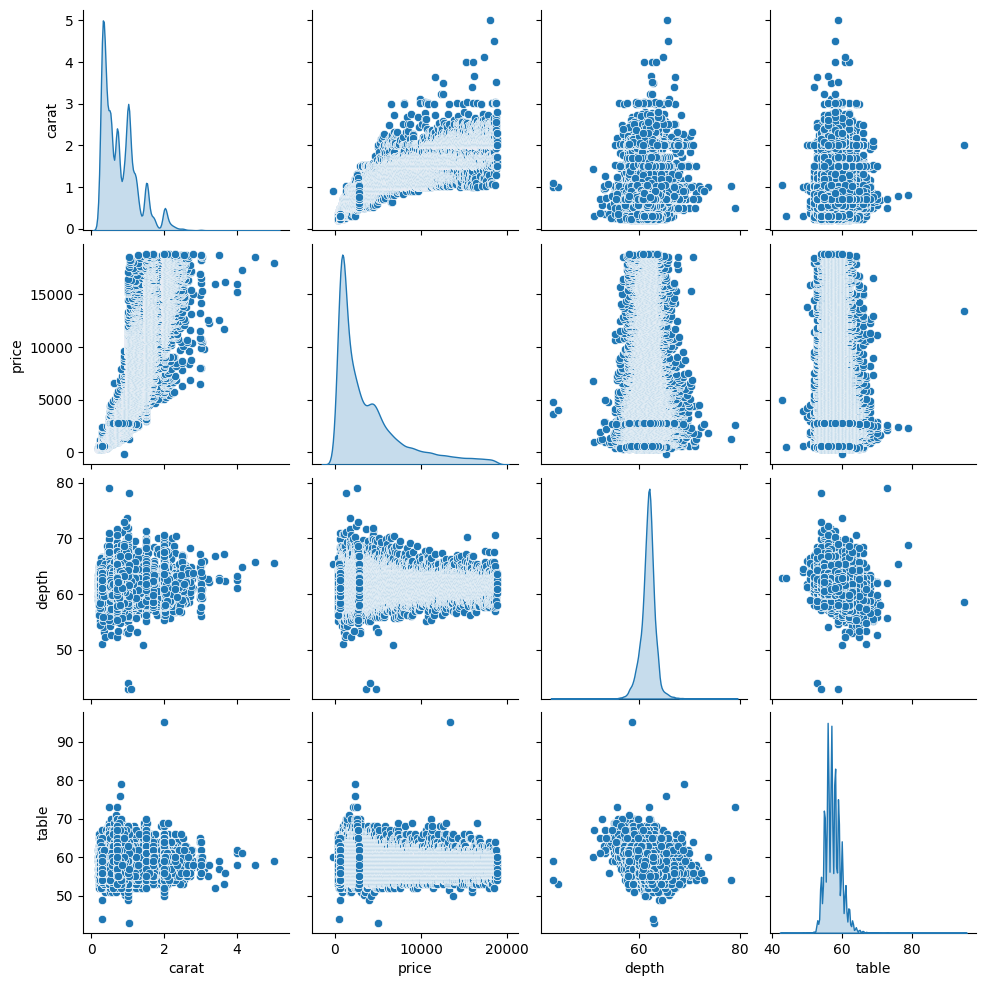

In [45]:
sns.pairplot(
    df[["carat", "price", "depth", "table"]],
    diag_kind="kde"
)
plt.show()


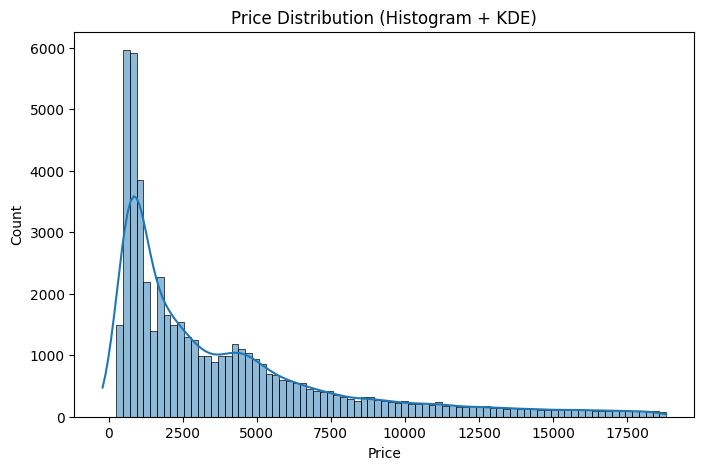

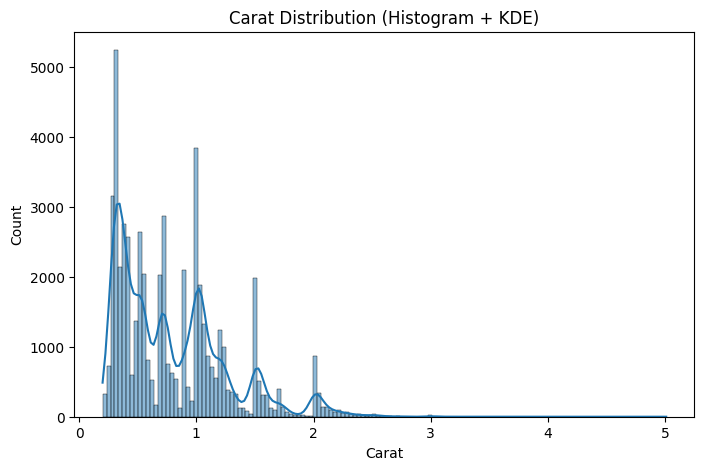

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['price'], kde=True, ax=ax)
ax.set_title("Price Distribution (Histogram + KDE)")
ax.set_xlabel("Price")
ax.set_ylabel("Count")
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['carat'], kde=True, ax=ax)
ax.set_title("Carat Distribution (Histogram + KDE)")
ax.set_xlabel("Carat")
ax.set_ylabel("Count")
plt.show()

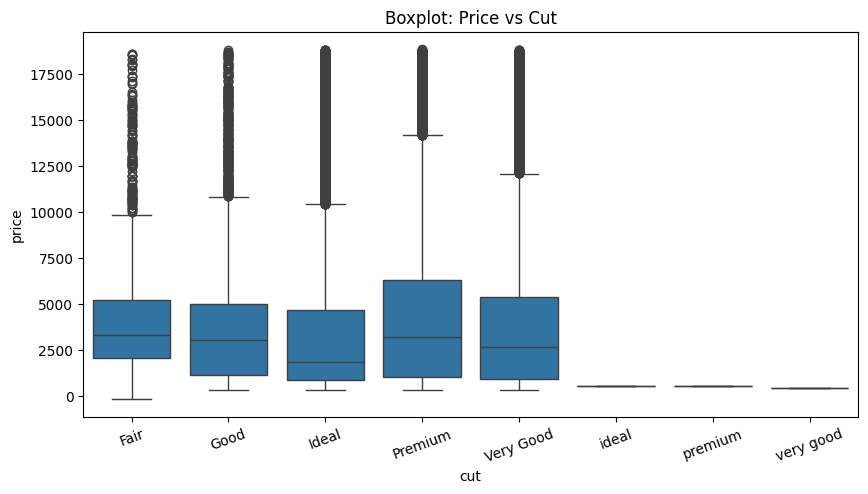

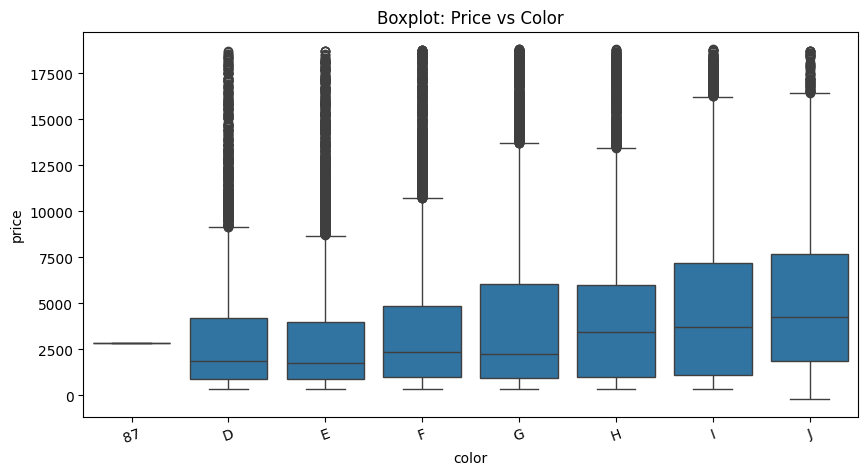

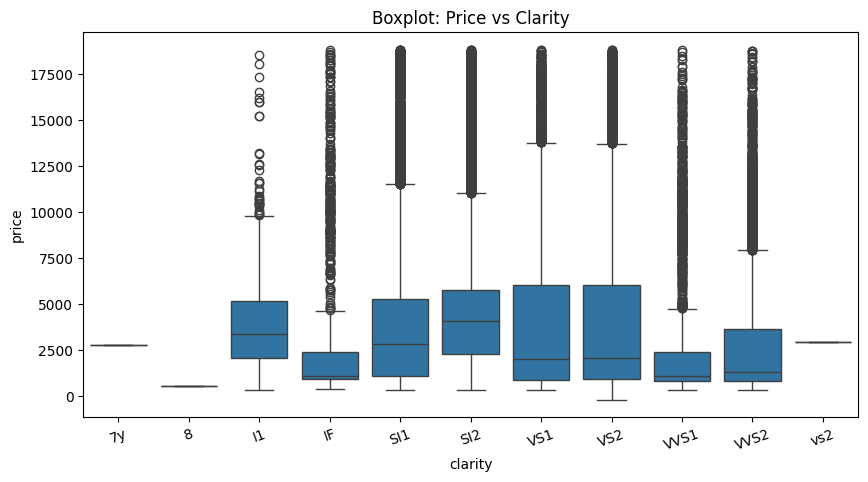

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, x='cut', y='price', ax=ax)
ax.set_title("Boxplot: Price vs Cut")
plt.xticks(rotation=20)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, x='color', y='price', ax=ax)
ax.set_title("Boxplot: Price vs Color")
plt.xticks(rotation=20)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, x='clarity', y='price', ax=ax)
ax.set_title("Boxplot: Price vs Clarity")
plt.xticks(rotation=20)
plt.show()

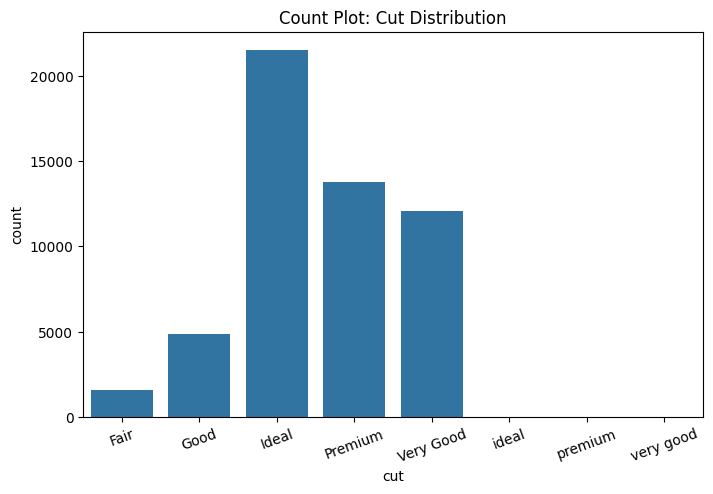

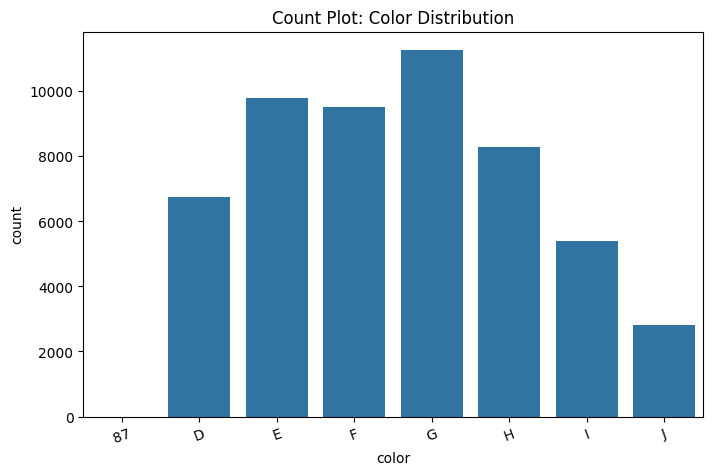

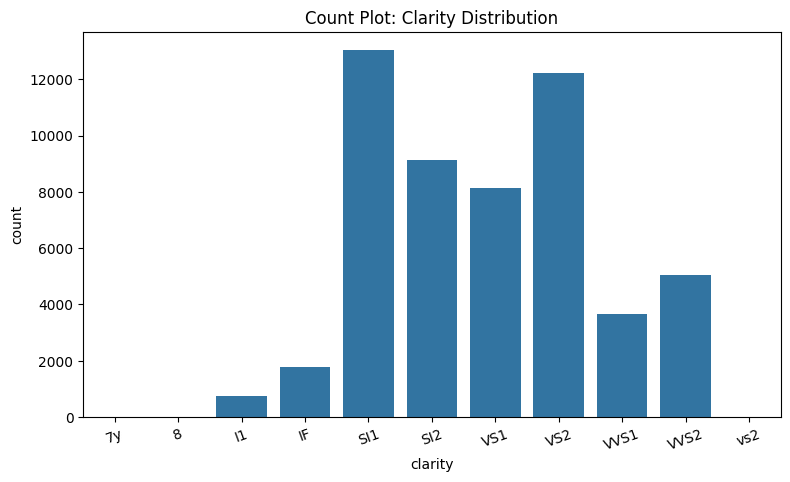

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df, x='cut', ax=ax)
ax.set_title("Count Plot: Cut Distribution")
plt.xticks(rotation=20)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df, x='color', ax=ax)
ax.set_title("Count Plot: Color Distribution")
plt.xticks(rotation=20)
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
sns.countplot(data=df, x='clarity', ax=ax)
ax.set_title("Count Plot: Clarity Distribution")
plt.xticks(rotation=20)
plt.show()